# Introduction to Python programming for data journalism

## COMM318 Fall 2019 (08/27/19)

### Instructor: Matt O'Donnell (mbod@asc.upenn.edu)


### Course Overview

* This notebook uses a dataset from OpenDataPhilly on vehicular crashes to demonstrate the range of analytic techniques and programming skills we will learn in this course.


------

# Why learn programming and data analysis skills for making stories from data?
## Testing data in stories, finding stories in data and making stories from data

* In the era of _big data_ we frequently encouter stories in various forms of media that make assertions and claim to be based on the analysis of large datasets. It is often possible to access and analyze the data of relevance behind these stories. This allows us, for example, to test the claims, the focus and framing of a news article reporting. While there a number of online tools to explore and visualize open datasets, developing programming skills will allow you greater flexibility and the ability to filter, group and combine data in anticipated and unsupported ways.


* As more and more data is available it becomes vital for more people to acquire and spread the skills for handling these data beyond just a handful of data storytelling experts and media sources. There has been lots of discussion of _open data_ and _data democratization_ (both within private and public realms) espousing the benefits of making data available to "everyone" beyond its traditional management and analysis by IT departments and statisticans. One element of this is making the data available and easily accesible. But equally (if not _more_) important than this is having ability to analytically handle these datasets. While it would be a mistake to suggest that learning programming __and__ data analysis is a trival or quick thing to do. It is certainly not beyond the reach of motivated individuals and there are many resources available to teach programming languages, such as Python and R. One might even argue that it is the responsibility of modern citzens to become data literate and this should include acquiring some basic data analysis and programming skills.


* Having the ability to acquite, analyze and to discover and interpret patterns in data means that more stories can be told beyond the core of those selected by traditional media sources for broad appeal, political, commercial and other reasons.


* As students of communication theory we know that effective and persausive communication is not just about sharing the right (or true) information but also about how you select from, order and present (frame) this information. This becomes all the more crucial as the amount data increases. A fundamental skill for telling stories from data is first being able to identify the stories __in__ data. These might be found by describing and summarizing what is there, identifying trends over time or in making comparisons between different groups, categories and factors, and so on. These stories in data then become the components of the larger story you can tell from the data.


* Data journalism or data storytelling requires skills in:
    * some programming 
    * data analysis and visualization
    * identifying patterns (stories) in data 
    * telling stories from these patterns





# Example: Analyzing vehicular crash data for Philadelphia 2007-2017

* Here we make use of data made available on www.opendataphilly.org derived from the annual crash data compiled by Penn DOT for Pennsylvania.
   * https://www.opendataphilly.org/dataset/vehicular-crash-data
   


### Setup notebook

* The first Python code in a notebook should include all the modules and functions that you need to use for the analysis. These are grouped together at the top and not scattered throughout the notebook to make it clearer and more reproducible.


* For data analysis we are going to use a popular and powerful code library called `pandas` (https://pandas.pydata.org/) that provides data structures and functionality optimized for data analysis and particularly for working with data in the form of a table.

In [22]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

### 1. Load the data

* We will look at some of the most common data formats used to store data in files. Here we have downloaded the CSV (comma separated value) format version of the vehicular crash data. 


* Here is a subset of the data with 7 recorded crashes and a small handful of the features recorded about each crash:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>day_of_week</th>      <th>county_name</th>      <th>collision_type</th>      <th>dec_lat</th>      <th>dec_long</th>    </tr>  </thead>  <tbody>    <tr>      <td>3</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0446</td>      <td>-75.0547</td>    </tr>    <tr>      <td>5</td>      <td>Philadelphia</td>      <td>4</td>      <td>39.9693</td>      <td>-75.1432</td>    </tr>    <tr>      <td>7</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0490</td>      <td>-75.0707</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>6</td>      <td>39.9034</td>      <td>-75.1504</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>1</td>      <td>40.0512</td>      <td>-74.9892</td>    </tr>    <tr>      <td>6</td>      <td>Philadelphia</td>      <td>8</td>      <td>39.9352</td>      <td>-75.1542</td>    </tr>    <tr>      <td>4</td>      <td>Philadelphia</td>      <td>4</td>      <td>40.0811</td>      <td>-75.0391</td>    </tr>  </tbody></table>


* The CSV format is a simple text format organized with one line for each instance (i.e. a crash) and each feature or data point about the crash (i.e. number of people involved, time of day, kind of injuries, etc.) is separated by a comma. The first line of the file usually contains the names of features. 


* A CSV representation of the table above is:

```
day_of_week,county_name,collision_type,dec_lat,dec_long
3,Philadelphia,1,40.0446,-75.0547
5,Philadelphia,4,39.9693,-75.1432
7,Philadelphia,4,40.049,-75.0707
6,Philadelphia,6,39.9034,-75.1504
4,Philadelphia,1,40.0512,-74.9892
6,Philadelphia,8,39.9352,-75.1542
4,Philadelphia,4,40.0811,-75.0391
```

#### _Key point_

* A **fundamental point** to take on right at the beginning is that it is here in things a mundane as the data format that we begin to look for the stories in data. It is easy to rush through the steps of acquiring and loading a big data set in order to push it through a data analysis and visualization pipeline or tool, without stopping to think about what each row and column represents. 

    * Here each row is an incidence of a crash, which for the individuals involved is a major and serious life event and sadly perhaps a life threatening or life ending event. This event is a story located a particular time and place. 
    * Then the columns represent the potential narrative foci as we begin to group together one, two, ten, 300, thousands of these crash incidents. 
        * What times of day do crashes most often occur?
        * Are there particularly intersections where a lot of crashes occur?
        * When a bicycle is involved are the injuries more serious then two or more cars?

#### Load the data

* We use the `pd.read_csv()` function to read the data from the CSV file into a data structure called a __data frame__. 


* A data frame is a table structure with:
    * `Rows` (each line in the CSV file, i.e. a crash)
    * `Columns` (each of the features recorded in the CSV file about crashes)
    * `An index` (a unique way of identifying and accessing each of the rows)

In [3]:
crash_data = pd.read_csv('data/crash_data_collision_crash_2007_2017.csv')

#### Inspect the data

* The first step is always to try to get a sense of the size (dimensions), type and quality of the data.


* Key questions include:
    * How many rows (observations) does it have?

    * How many columns (different types of features) are there?

    * How comprehensive and varied are these features across the dataset?
        * For example, there may be a column that records whether a deer is involved in the crash. But for Philadelphia city crashes this is likely to most often be 0 or not recorded. And it is therefore probably not the story we are going to tell!

    * Are there missing values?
    
    
* A pandas `DataFrame` is a Python __OBJECT__ that has:
    * attributes - sequences of data
    * functions - sets of operations or steps that can be applied to these data
 
 (do not worry about this terminology or what it means at the moment!)
 
 
* The `.shape` attribute gives the dimensions of the `DataFrame` and reports the number of rows first, followed by the number of columns.

In [23]:
crash_data.shape

(77462, 90)

#### _Key point_

* So we have almost 800,000 accidents involving vehicles recorded in a ten year period. 
    * That is a large number! 
    * There are stories to be told.
    * Don't forget the human side of what these numbers represent.
    
    
* There are 90 columns. So each crash incident had a range of features noted. Understanding what these features are is vital to being able to find the stories in the data.
    
 
* The size of the data necessities that we approach it computationally and quantitatively, that is, we cannot try and read it row by row! However, it is good practice to do some visual spot checks as a way to familiarize yourself with the data.

In [24]:
crash_data.head()

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,,
1,,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,,
2,,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,,
3,,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,,
4,,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,,


In [34]:
crash_data.tail()

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
77457,,77458,2012004815,6,67,67301,2011,12,5,1250,...,0,0,0,0,0,0,39.9849,-75.2368,,
77458,,77459,2011115410,6,67,67301,2011,10,6,759,...,0,0,0,0,8,0,40.0270,-75.0654,,
77459,,77460,2011118190,6,67,67301,2011,10,3,9999,...,0,0,0,0,8,1,40.0021,-75.1678,,
77460,,77461,2011118469,6,67,67301,2011,10,5,1600,...,0,1,0,0,8,0,40.0154,-75.0679,,
77461,,77462,2011132575,6,67,67301,2011,12,7,1238,...,0,0,0,0,4,0,39.8820,-75.2455,,


In [35]:
crash_data.sample(10)

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
5839,,5832,2017067951,6,67,67301,2017,6,5,1408,...,0,0,0,0,9,0,40.0319,-75.0879,,Philadelphia
65504,,65505,2012064019,6,67,67301,2012,5,5,1530,...,0,1,0,0,4,0,39.9563,-75.2295,,
33407,,33408,2015131259,6,67,67301,2015,11,3,1730,...,0,0,0,0,4,0,40.0513,-75.0799,,
29243,,29244,2015081062,6,67,67301,2015,7,2,9999,...,0,0,0,0,0,0,39.9945,-75.0980,,
76501,,76502,2011126265,6,67,67301,2011,11,3,1719,...,0,1,0,0,3,0,40.0501,-75.1423,,
42650,,42651,2014122436,6,46,46102,2014,11,2,1140,...,0,0,0,0,4,0,40.0653,-75.0904,,
1427,,1420,2017008876,6,67,67301,2017,1,1,2032,...,0,0,0,0,0,0,39.9281,-75.1962,,Philadelphia
23372,,23373,2015028800,6,67,67301,2015,2,1,1924,...,0,0,0,0,8,0,39.9860,-75.1415,,
68278,,68279,2012122357,6,67,67301,2012,11,1,1506,...,0,0,0,0,4,0,40.0715,-75.1863,,
63066,,63067,2012068724,6,67,67301,2012,6,1,900,...,0,0,0,0,4,0,40.0532,-75.1387,,


In [25]:
crash_data.head(20)

,wz_ln_closure,objectid_1,crn,district,county,municipality,crash_year,crash_month,day_of_week,time_of_day,...,bicycle_maj_inj_count,ped_count,ped_death_count,ped_maj_inj_count,max_severity_level,comm_veh_count,dec_lat,dec_long,rdwy_surf_type_cd,county_name
0,,9498,2016019772,6,67,67301,2016,2,2,1515,...,0,1,0,0,3,0,40.0628,-75.0577,,
1,,9570,2016013724,6,67,67301,2016,1,3,1100,...,0,0,0,0,3,0,40.0822,-74.9669,,
2,,9642,2016038282,6,67,67301,2016,3,5,632,...,0,0,0,0,0,1,39.9751,-75.1946,,
3,,9714,2016052220,6,67,67301,2016,2,5,1900,...,0,0,0,0,8,0,40.0357,-75.2171,,
4,,9786,2016087187,6,67,67301,2016,8,6,1535,...,0,1,0,0,4,0,39.9511,-75.1721,,
5,,9858,2016048649,6,67,67301,2016,4,5,815,...,0,0,0,0,4,0,39.9722,-75.2260,,
6,,9930,2016017030,6,67,67301,2016,1,4,1850,...,0,0,0,0,8,0,39.9849,-75.1583,,
7,,9019,2016026138,6,67,67301,2016,2,6,855,...,0,0,0,0,2,0,40.0123,-75.1754,,
8,,1,2017037489,6,67,67301,2017,3,3,139,...,0,0,0,0,8,1,40.0446,-75.0547,,Philadelphia
9,,2,2017014006,6,67,67301,2017,1,5,700,...,0,0,0,0,8,0,39.9693,-75.1432,,Philadelphia


In [12]:
crash_data.columns.sort_values()

Index(['arrival_tm', 'automobile_count', 'belted_death_count',
       'belted_maj_inj_count', 'bicycle_count', 'bicycle_death_count',
       'bicycle_maj_inj_count', 'bus_count', 'collision_type',
       'comm_veh_count', 'cons_zone_spd_lim', 'county', 'county_name',
       'crash_month', 'crash_year', 'crn', 'day_of_week', 'dec_lat',
       'dec_long', 'dispatch_tm', 'district', 'driver_count_16yr',
       'driver_count_17yr', 'driver_count_18yr', 'driver_count_19yr',
       'driver_count_20yr', 'driver_count_50_64yr', 'driver_count_65_74yr',
       'driver_count_75plus', 'est_hrs_closed', 'fatal_count',
       'heavy_truck_count', 'hour_of_day', 'illumination', 'injury_count',
       'intersect_type', 'lane_closed', 'latitude', 'ln_close_dir',
       'location_type', 'longitude', 'maj_inj_count', 'max_severity_level',
       'mcycle_death_count', 'mcycle_maj_inj_count', 'min_inj_count',
       'mod_inj_count', 'motorcycle_count', 'municipality', 'ntfy_hiwy_maint',
       'objectid', 

In [28]:
crash_data['crash_year'].describe()

count    77462.000000
mean      2014.068537
std          1.982414
min       2011.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2017.000000
Name: crash_year, dtype: float64

In [33]:
crash_data['crash_year'].astype('category')

2016    12137
2015    11453
2012    11281
2013    11072
2017    11013
2014    10565
2011     9941
Name: crash_year, dtype: int64

In [13]:
len(crash_data.columns)

90

### News and other sites

https://www.phillytrib.com/news/local_news/philly-s-riskiest-deadliest-roads-in-black-and-brown-neighborhoods/article_1d03b88e-2edf-5cbd-9f42-dd5eddf8fedf.html

https://usa.streetsblog.org/2018/02/12/philadelphias-boulevard-of-death/

https://billypenn.com/2017/02/06/how-roosevelt-boulevard-became-the-most-dangerous-road-in-philadelphia/


* KnowPA - infoviz example dashboards - http://www.knowpa.com/

opendata source

https://www.opendatanetwork.com

### Legal firms citing crash data


> Roosevelt Boulevard, Philadelphia, Pennsylvania
> 
> While the other roads mentioned on this list are highways, Roosevelt Boulevard in Philadelphia is included because of its notoriety as one of the most dangerous thoroughfares in America. The boulevard consists of six 12-foot wide lanes in each direction, and drivers regularly exceed the posted 45 miles per hour and take the road’s dangerous curves far too fast. The boulevard also has two of the nation’s most dangerous intersections, where confused drivers frequently turn into the wrong three-lane stretch of traffic.

https://www.hg.org/legal-articles/5-of-the-most-dangerous-roads-in-the-u-s--32057

> Pennsylvania roads are dangerous, and with its large concentration of population, Philadelphia has the greatest number of crash-related deaths. In fact, according to PennDOT data on fatal car accidents, Philadelphia had more than a quarter of the road segments that were among the state’s most deadly from 2015-2017. During this period, Philly had 24 road segments with 155 total fatal collisions, leading to 167 deaths. This amounted to about a third of the segments with at least four deaths in the entire state.

https://www.wnwlaw.com/philly-four-pennsylvanias-ten-deadliest-roads/


* Study by law firm

https://www.dallashartman.com/blog/2019/01/deadly-roads-pa/

In [1]:
import graphviz

In [10]:
DG=graphviz.Digraph()
DG.edge('QUESTION', 'DATA SOURCE', label='identify relevant')
DG.edge('DATA SOURCE', 'DATA', label='download')

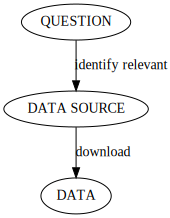

In [11]:
DG